# Machine learning for image classification project

The goal of the project will be to build a functional, flexible and modular ML model in python for image classification as a practice.

## Scope: do build and optimize a machine learning model on a image classification task. 
As the project advances I hope to be able to investigate a bit the trade-offs between number of classes included, precision and the space of the hyperparameters that is searched.

## Import modules
I like to keep track of all modules used in the project by importing them on top

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from skimage.feature import hog

## Loading and preparing the dataset

I will be using the [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset.
For more info check Chapter 3 of this tech report:
- [Learning Multiple Layers of Features from Tiny Images](https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf), Alex Krizhevsky, 2009.

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class. 

First I will define some functions to load and reshape the data as needed. Then I will load the dataset, leaving flexibility for the amount of batches loaded. I shal plot some images to check that de data was loaded correctly.

Loading the test data will only be done after training the model.

In [2]:
# This code is for the pickled version of the data, prepared for Python

# Change this according to your needs
path_to_data = r"../cifar-10-batches-py/"

class Training_data():
    """
    Class to load and hold the training data that we want.
    """
    def __init__(self, path, batches):
        """
        Get the path, the batches we want to load, and call the loading routine for each batch
        Also, Load the dict to convert label to human readable.
        """
        self.path = path
        self.batches = batches
        self.loadnames()
        for batch in batches:
            if batch == batches[0]:
                self.data, self.labels = self.load(batch)
            else:
                new_data, new_labels = self.load(batch)
                self.data = np.row_stack((self.data, new_data))
                self.labels.append(new_labels)
            
    def load(self, batch):
        """
        Load the batch file, and return the data structured.
        """
        file = self.path + "data_batch_" + str(batch)
        batch_file = self.unpickle(file)
        return self.structure(batch_file[b'data'], batch_file[b'labels'])
        
    def unpickle(self, file):
        """
        Method to load the pickled version of the dataset.
        """
        with open(file, "rb") as fo:
            im_dict = pickle.load(fo, encoding = "bytes")
        return im_dict
    
    def structure(self, data, labels):
        """
        Reshape the 1D image data to the correct shape for image viewing with matplotlib
        """
        data = np.reshape(data, (-1, 3, 32, 32))
        data = np.transpose(data, (0, 2, 3, 1))
        return data, labels
    
    def loadnames(self):
        labeldict = self.unpickle(self.path + "batches.meta")
        self.labelnames = {}
        for i in range(10):
            self.labelnames[i] = labeldict[b'label_names'][i].decode()

Now use the defined class to load the data

In [3]:
training_data = Training_data(path_to_data, [1])

Show the image for a given datapoint, and plot the human readable label to check if the provided data makes sense

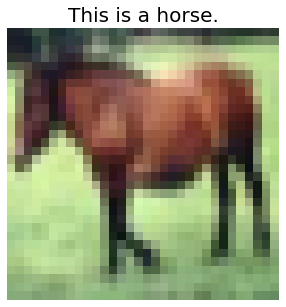

In [26]:
# Insert datapoint here
datapoint = 7

# Plot and add label as title
plt.figure(figsize = (5, 5))
plt.imshow(training_data.data[datapoint])
plt.title("This is a " + training_data.labelnames[training_data.labels[datapoint]] + ".", fontsize = 20)
plt.axis('off')
plt.show()

## Feature engineering
Just blindly fitting a model will not work.
Some reduction of the size of the dataset before fitting would come in handy.

As we are working with images, one of the most common reduction methods is going for a historgam of oriented gradients (HOG).
scikit-image has a provision for that.

Again, we will try to plot what we are doing with the data.

First, check what our HOG does to our previously plotted datapoint, and the remaining feature size.

Remember the full picture is 32×32×3 = 3072

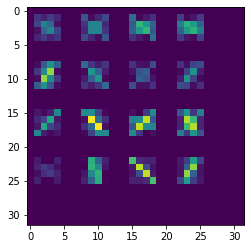

288


In [34]:
hog_options = {"pixels_per_cell" : (7,7),
               "cells_per_block" : (2, 2),
               "orientations" : 8,
               "block_norm" : 'L2-Hys',
               "visualize" : True, # For our example we want to see what we do
               "channel_axis" : -1
               }

data_hog, data_im = hog(training_data.data[datapoint], **hog_options)

plt.imshow(data_im)
plt.show()
print(data_hog.size)

In [21]:
32*32

1024